<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
!pip install ydata_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

kRandomState = 42
random.seed(kRandomState)
np.random.seed(kRandomState)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


**Ваш ответ здесь.** Столбцы с пропусками (сначала в df_train потом в df_test):

In [6]:
df_train.columns[df_train.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [7]:
df_test.columns[df_train.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

Теперь посмотрим на явные дубликаты в датастеах

In [8]:
df_train.duplicated().sum()

np.int64(985)

In [9]:
df_test.duplicated().sum()

np.int64(62)

In [10]:
df_train[df_train.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
326   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
...       ...         ...                  ...    ...  
6880  1461 CC  108.45 bhp       240Nm@ 1750rpm    5.0  
6881  1248 CC   88.50 bhp       200Nm@ 1750rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[985 rows x 13 columns]

In [11]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")
#profile.to_widgets() # does not work in colab :(
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:02<00:00,  4.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> **Вывод:** в df_train

~3% пропущенных данных. Их можно без вреда удалить из датасета.

~15% дубликатов. Это достаточно сильно уменьшает тренеровочную выборку, но их придется удалить.

Тестовая быборка так же будет уменьшена в связи с наличием пропусков и дубликатов.

Теперь дадим описание датасету по колонкам:

- nanme - из этой колонки можно выделить дополнительную колонку - марка автомобиля. Так как это может дать дополнительную информацию. Например, при прогнозировании цены мы можем получить информацию о вилке для каждой модели. Формат колонки категориальный поэтому ей нужно будет закодировать OHE.

- fuel, seller_type, transmission, engine - нужно будет закодировать с использованием OHE

- owner - уже можно закодировать с помощью числовой последовательность так, как чем меньше владельцев, тем лучше

- mileage - содержир различные единицы: kmpl, km/kg. В качетсве основных единиц измерения нужно выбрать kmpl так как встерчается чаще чем всего. Преобразовать колонку в числовой формат. Другие единицы измерения перевести в kmpl

- max_power - перевести в числовой формат

- torque - разделить на две колонки и превести к единым единицам измерения. Для этого параметра будут дополнительные сложность с парсингом так, как данные записаны в разных форматах.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [12]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [13]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [14]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [15]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

> __Вывод:__ Среднее и медиана незначительно отличаются между тестом и трейном. Единственное отличие в параметры max в колонках: selling_prince, km_driven в тесте они отличаются на 2 разяда от 75% в то же время в тестовой выборке такого не наблюдается, что может говорить о выбросах.

Рассматривая датасеты в общем можем сказать, что у них очень похожее распределение и недолжно возникнуть никаких проблем при обучении на тесте и проверка на тесте. Единственное сильное отличие только в том, что автомобили моложе на 12 лет (параметр year(min)).

Тоже самое можно сказать и про категориальные параметры. Колиства иникальных параметров сохраняется между выборками. Между тестом и трейном сохняюся популятные парметры во всех колонках, кроме name и torque.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [16]:
subset_train = df_train.columns
subset_train = subset_train.drop('selling_price')
df_train.duplicated(subset=subset_train).sum()

np.int64(1159)

> Как мы видим в трейне есть 985 дубликатов

In [17]:
print(df_train[df_train.duplicated(subset=subset_train)])

                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9

In [18]:
df_train = df_train.drop_duplicates(subset=subset_train, keep='first')

In [19]:
assert df_train.shape == (5840, 13)

In [20]:
df_train = df_train.reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

Проверим дубликаты в тесте. Их наличие повлияет на результат оценки модели. Возможно потом приедтся удалить

In [21]:
df_test.duplicated(subset=subset_train).sum()

np.int64(69)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

#### engine

In [22]:
df_train['engine'].unique()

array(['1248 CC', '1498 CC', '1396 CC', '1298 CC', '1197 CC', '1061 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1198 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC', '1497 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '2755 CC', '1968 CC',
       '1196 CC', '1373 CC', '1598 CC', '1998 CC', '1086 CC', '1194 CC',
       '1798 CC', '1405 CC', '1582 CC', '999 CC', '2487 CC', '1999 CC',
       '2987 CC', '1995 CC', '1451 CC', '1969 CC', '2967 CC', '2497 CC',
       '1797 CC', '1991 CC', '2362 CC', '1493 CC', '1341 CC', '1199 CC',
       '1794 CC', '1193 CC', '2696 CC', '799 CC', '1495 CC', '1186 CC',
       '1047 CC', '2498 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC',
       '1984 CC', '2354 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '814 CC', '1997 CC', '1948 CC', '2997 CC', '1172 CC', '2489 CC',
       '2499 CC', '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC',
       '1462 CC', '2956 CC', '1527 CC', '2199 CC', '995 CC', '1599

In [23]:
df_train['engine'] = df_train['engine'].str.replace(' CC', '').astype(float)
df_train['engine'].unique()

array([1248., 1498., 1396., 1298., 1197., 1061.,  796., 1364., 1399.,
       1461.,  993.,   nan, 1198.,  998., 1591., 2179., 1368., 1497.,
       2982., 2494., 2143., 2477., 2755., 1968., 1196., 1373., 1598.,
       1998., 1086., 1194., 1798., 1405., 1582.,  999., 2487., 1999.,
       2987., 1995., 1451., 1969., 2967., 2497., 1797., 1991., 2362.,
       1493., 1341., 1199., 1794., 1193., 2696.,  799., 1495., 1186.,
       1047., 2498., 2523., 1120.,  624., 1496., 1984., 2354.,  793.,
       1799.,  936., 1956.,  814., 1997., 1948., 2997., 1172., 2489.,
       2499., 2609., 2953., 1150., 1994., 1388., 1462., 2956., 1527.,
       2199.,  995., 1599., 2993., 1586., 1390.,  909., 2393., 3198.,
       1499., 3604., 1339., 2092., 1595., 2496., 1596., 1597., 2596.,
       2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896., 1796.,
       1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343., 2446.,
       3498., 2198., 2776., 1950.])

In [24]:
df_test['engine'].unique()

array(['2498 CC', '1497 CC', '1799 CC', '1498 CC', '1172 CC', '995 CC',
       '1197 CC', '796 CC', '1582 CC', '2487 CC', '1196 CC', '3604 CC',
       '1373 CC', '1405 CC', '1495 CC', '1248 CC', '998 CC', '624 CC',
       '2179 CC', '1120 CC', '1396 CC', '1461 CC', '2494 CC', '1596 CC',
       nan, '1198 CC', '1086 CC', '1399 CC', '1598 CC', '2523 CC',
       '1199 CC', '814 CC', '1298 CC', '999 CC', '1496 CC', '1995 CC',
       '799 CC', '1984 CC', '936 CC', '2755 CC', '1586 CC', '1364 CC',
       '2956 CC', '993 CC', '1493 CC', '1186 CC', '1991 CC', '1969 CC',
       '1194 CC', '2982 CC', '2499 CC', '1999 CC', '1047 CC', '1798 CC',
       '1968 CC', '1997 CC', '2993 CC', '1499 CC', '1591 CC', '1150 CC',
       '2143 CC', '1061 CC', '1193 CC', '2393 CC', '1797 CC', '2835 CC',
       '1597 CC', '2497 CC', '1599 CC', '1794 CC', '3198 CC', '2987 CC',
       '1388 CC', '1956 CC', '2477 CC', '2609 CC', '1998 CC', '1948 CC',
       '909 CC', '1462 CC', '1341 CC', '1368 CC', '2953 CC', '2696

In [25]:
df_test['engine'] = df_test['engine'].str.replace(' CC', '').astype(float)
df_test['engine'].unique()

array([2498., 1497., 1799., 1498., 1172.,  995., 1197.,  796., 1582.,
       2487., 1196., 3604., 1373., 1405., 1495., 1248.,  998.,  624.,
       2179., 1120., 1396., 1461., 2494., 1596.,   nan, 1198., 1086.,
       1399., 1598., 2523., 1199.,  814., 1298.,  999., 1496., 1995.,
        799., 1984.,  936., 2755., 1586., 1364., 2956.,  993., 1493.,
       1186., 1991., 1969., 1194., 2982., 2499., 1999., 1047., 1798.,
       1968., 1997., 2993., 1499., 1591., 1150., 2143., 1061., 1193.,
       2393., 1797., 2835., 1597., 2497., 1599., 1794., 3198., 2987.,
       1388., 1956., 2477., 2609., 1998., 1948.,  909., 1462., 1341.,
       1368., 2953., 2696., 1595., 2198., 2489., 2694., 2354.])

#### max_power

In [26]:
df_train['max_power'].unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp',
       '47.3 bhp', '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp',
       '40.3 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '120 bhp', '94.68 bhp', '160 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp',
       '126.2 bhp', '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp',
       '177 bhp', '148.31 bhp', 

In [27]:
df_train['max_power'].str.split().str[1].unique()

array(['bhp', nan], dtype=object)

In [28]:
df_train['max_power'] = df_train['max_power'].str.split().str[0]
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')
df_train['max_power'].unique()


array([ 74.   , 103.52 ,  90.   ,  88.2  ,  81.86 ,  57.5  ,  37.   ,
        67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,  67.   ,
        82.   ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,  83.1  ,
        47.3  ,  73.8  ,  34.2  ,  88.5  ,  35.   ,  40.3  , 121.3  ,
       138.03 , 160.77 , 117.3  , 116.3  ,  67.05 , 168.5  , 100.   ,
       120.7  ,  98.63 , 175.56 , 171.5  , 100.6  , 174.33 , 187.74 ,
       170.   ,  78.9  ,  88.76 ,  86.8  , 108.495, 108.62 ,  93.7  ,
       103.6  ,  98.59 , 189.   ,  67.04 ,  68.05 ,  58.2  ,  82.85 ,
        81.8  , 120.   ,  94.68 , 160.   , 155.   ,  69.01 , 126.32 ,
       138.1  ,  83.14 ,  83.8  , 126.2  ,  62.1  ,  86.7  , 188.   ,
       214.56 , 177.   , 148.31 , 254.79 , 190.   , 177.46 , 204.   ,
       141.   , 241.4  , 282.   , 150.   , 108.5  , 147.5  , 103.5  ,
       183.   , 181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,  68.   ,
        81.83 ,  75.   ,  85.8  ,  87.2  ,  53.   , 118.   ,  83.   ,
        84.   ,  58.

In [29]:
df_test['max_power'].str.split().str[1].unique()

array(['bhp', nan], dtype=object)

In [30]:
df_test['max_power'] = df_test['max_power'].str.split().str[0]
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')
df_test['max_power'].unique()

array([112.  , 108.5 , 130.  ,  98.6 ,  65.  , 105.  ,  62.  ,  85.8 ,
        46.3 , 126.2 , 214.56,  78.9 ,  86.8 , 280.  ,  93.7 ,  70.  ,
        80.  ,  74.  ,  67.1 ,  37.48,  74.02,  99.  , 140.  ,  88.73,
       121.  , 108.45, 102.  ,  99.6 ,    nan,  86.7 ,  68.  ,  98.79,
       103.5 ,  73.9 ,  69.01,  58.16,  62.1 ,  75.  ,  73.  ,  88.76,
        55.2 ,  88.8 ,  67.  ,  82.85, 190.  ,  53.64,  88.7 ,  98.96,
        83.1 ,  81.83,  83.  , 150.  ,  47.3 ,  71.  , 147.94, 117.3 ,
        81.8 ,  57.6 ,  84.8 , 174.5 ,  88.5 ,  84.  ,  82.  , 120.  ,
       142.  , 157.7 , 104.68,  67.06,  60.  ,  85.  ,  37.  ,  73.97,
       147.9 ,  69.  ,  94.68, 171.  ,  89.84,  94.  ,  52.  ,  63.  ,
       141.  , 100.  ,  78.  , 177.  ,  68.05,  99.23,  58.3 ,  97.9 ,
        72.4 , 116.3 , 126.32,  94.93,  79.4 ,  81.86,  98.59, 115.  ,
        52.8 , 118.  , 177.5 ,  53.3 , 121.31, 148.  ,  67.05, 100.6 ,
       110.  , 138.1 ,  83.83, 135.1 , 121.36, 117.6 , 241.  ,  83.8 ,
      

#### mileage

In [31]:
df_train['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '23.0 kmpl', '16.1 kmpl', '20.14 kmpl',
       '17.3 km/kg', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '19.7 kmpl',
       '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl', '21.5 kmpl',
       '21.4 kmpl', '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl',
       '14.0 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '27.3 kmpl',
       '11.36 kmpl', '17.68 kmpl', '18.53 kmpl', '14.84 kmpl',
       '21.12 kmpl', '20.36 kmpl', '21.27 kmpl', '18.16 kmpl',
       '22.0 kmpl', '25.1 kmpl', '20.51 kmpl', '21.66 kmpl', '25.2 kmpl',
       '22.9 kmpl', '16.02 kmpl', '20.54 kmpl', '22.77 kmpl',
       '15.71 kmpl', '23.1 kmpl', '19.02 kmpl', '19.81 kmpl',
       '26.2 km/kg', '16.47 kmpl', '15.04 kmpl', '18.5 kmpl', '19.1 kmpl',
       '21.79 kmpl', '18.8 kmpl

In [32]:
df_train['mileage'].str.split().str[1].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

Для перевода нужно воспользоваться формулой kmpl = km/kg * density, где density это полотность топлива. Поэтому сначала посмотрим с какми видом топлива встречаются эти единицы

In [33]:
df_train[df_train['mileage'].str.split().str[1] == 'km/kg']['fuel'].unique()

array(['LPG', 'CNG'], dtype=object)

Как видим встречается для
- LPG - Liquefied Petroleum Gas = 520 kg/m^3 (предполагаем что находится в жидкой форме)
- CNG - Compressed Natural Gas = 190 kg/m^3 (предполагаем что находится под давлением)

In [34]:
def converter_mileage(x, fuel):
  if pd.isna(x):
    return x

  val, units = x.split()
  if units == 'kmpl':
    return float(val)
  elif units == 'km/kg':
    if fuel == 'LPG':
      return float(val) * (1/520)
    elif fuel == 'CNG':
      return float(val) * (1/190)
    return float('nan')

In [35]:
df_train['mileage'] = df_train.apply(lambda row: converter_mileage(row['mileage'], row['fuel']), axis=1)
df_train['mileage'] = pd.to_numeric(df_train['mileage'], errors='coerce')
df_train['mileage'].unique()

array([2.34000000e+01, 2.11400000e+01, 2.30000000e+01, 1.61000000e+01,
       2.01400000e+01, 3.32692308e-02, 2.35900000e+01, 2.00000000e+01,
       1.90100000e+01, 1.73000000e+01, 1.93000000e+01,            nan,
       1.89000000e+01, 1.81500000e+01, 1.97000000e+01, 2.25400000e+01,
       2.10000000e+01, 2.55000000e+01, 2.65900000e+01, 2.15000000e+01,
       2.14000000e+01, 2.47000000e+01, 1.82000000e+01, 1.68000000e+01,
       2.43000000e+01, 1.40000000e+01, 1.76000000e-01, 2.39500000e+01,
       1.70000000e+01, 2.06300000e+01, 1.39300000e+01, 1.60000000e+01,
       1.78000000e+01, 1.25500000e+01, 1.29900000e+01, 1.48000000e+01,
       1.35000000e+01, 2.60000000e+01, 2.73000000e+01, 1.13600000e+01,
       1.76800000e+01, 1.85300000e+01, 1.48400000e+01, 2.11200000e+01,
       2.03600000e+01, 2.12700000e+01, 1.81600000e+01, 2.20000000e+01,
       2.51000000e+01, 2.05100000e+01, 2.16600000e+01, 2.52000000e+01,
       2.29000000e+01, 1.60200000e+01, 2.05400000e+01, 2.27700000e+01,
      

In [36]:
df_test['mileage'].str.split().str[1].unique()

array(['kmpl', nan, 'km/kg'], dtype=object)

In [37]:
df_test[df_test['mileage'].str.split().str[1] == 'km/kg']['fuel'].unique()

array(['CNG', 'LPG'], dtype=object)

In [38]:
df_test['mileage'] = df_test.apply(lambda row: converter_mileage(row['mileage'], row['fuel']), axis=1)
df_test['mileage'] = pd.to_numeric(df_test['mileage'], errors='coerce')
df_test['mileage'].unique()

array([1.40000000e+01, 2.15000000e+01, 1.29000000e+01, 2.51000000e+01,
       1.65000000e+01, 1.65500000e+01, 1.80000000e+01, 1.85000000e+01,
       1.97000000e+01, 1.96700000e+01, 2.20000000e+01, 2.23700000e+01,
       2.58000000e+01, 2.03600000e+01, 1.81600000e+01, 9.50000000e+00,
       1.60200000e+01, 1.94000000e+01, 1.70000000e+01, 1.63600000e+01,
       2.29000000e+01, 1.90000000e+01, 2.19000000e+01, 2.84000000e+01,
       2.58300000e+01, 1.60000000e+01, 2.40000000e+01, 2.11900000e+01,
       1.73000000e+01, 1.96000000e+01, 1.28000000e+01, 1.40900000e+01,
                  nan, 2.03000000e+01, 2.23000000e+01, 1.37000000e+01,
       1.43000000e+01, 1.93000000e+01, 1.90900000e+01, 1.40000000e-01,
       1.59600000e+01, 2.08600000e+01, 1.53700000e+01, 1.95000000e+01,
       2.11000000e+01, 2.07700000e+01, 1.75000000e+01, 2.30100000e+01,
       1.67800000e+01, 2.27000000e+01, 2.21000000e+01, 2.17000000e+01,
       2.14000000e+01, 2.25400000e+01, 1.86000000e+01, 1.68000000e+01,
      

#### torque

In [39]:
#torque и max_torque_rpm
df_train[df_train['torque'].str.contains('@', na=False)]['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '60Nm@ 3500rpm', '90Nm@ 3500rpm',
       '151Nm@ 4850rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 4800rpm',
       '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm',
       '219.6Nm@ 1500-2750rpm', '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm',
       '130Nm@ 4000rpm', '205Nm@ 1750-3250rpm', '

In [40]:
df_train[~df_train['torque'].str.contains('@', na=False)]['torque'].unique()

array(['22.4 kgm at 1750-2750rpm', nan, '400Nm', '250 Nm at 2750 rpm',
       '146Nm at 4800 rpm', '11.4 kgm at 4,000 rpm',
       '180 Nm at 1440-1500rpm', '135 Nm at 2500  rpm ',
       '24 KGM at 1900-2750 RPM', '220Nm at 1400-2600 rpm',
       '260 Nm at 1800-2200 rpm', '190 Nm at 1750 rpm ',
       '14.9 KGM at 3000 RPM', '190 Nm at 1750  rpm ', '400 Nm /2000 rpm',
       '155 Nm at 1600-2800 rpm', '135 Nm at 2500 rpm', '210 / 1900',
       '96 Nm at 3000 rpm', '13.9 kgm at 4200 rpm',
       '250 Nm at 1,500-3,000 rpm', '180 Nm at 2000rpm',
       '190 Nm at 1750 rpm', '190 Nm at 2000rpm'], dtype=object)

парсить будем по следующему алгоритму:
- находим слова и числа и дбавляем их в список. чисел может быть больше 3, но 3 число будет разброс и его можно игнорировать. В случае со словами игнорируем слова at
- мы знаем что первое число и первое слово обозначают момент поэтому переведом момент в Nm. Это будет значение колонки torque
- второе число и втрое слово обознают rpm. На слово можно не смотреть так как везде исопльзются одинаковые единицы измерения. Число может быть задано диапазоном через '-' поэтому нужно будет вычислить среднее
- для перевода воспользуется формулой Nm=kgm / 9.80665

In [41]:
def parse(s, col=0):
  if pd.isna(s):
    return s
  s = s.lower()
  words = []
  w = ""
  g = 'd'
  for i in s:
    if i in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-', '.', '~']:
      if g != 'd' and w != "":
          words.append(w)
          w =""
      g = 'd'
      w += i
    elif i.isalpha():
      if g != 'a' and w != "":
          words.append(w)
          w = ""
      g = 'a'
      w += i
    elif i in [' ', '@']:
      if w != "":
        words.append(w)
      w = ""
    elif i == ',':
      pass
    else:
      if w != "":
        words.append(w)
      w = ""
  if w != "":
      words.append(w)
  if 'at' in words:
    words.remove('at')

  torque = float(words[0])
  if 'kgm' in words:
    torque *= 9.80665
  rpm = float('nan')
  if any(c.isdigit() for c in words[1]):
    rpm = words[1]
  elif len(words) >= 3 and any(c.isdigit() for c in words[2]):
    rpm = words[2]
  else:
    return [torque, rpm][col]
  if '+/-' in s:
    w = ""
    for i in range(s.find('+/-'), len(s)):
      if s[i].isdigit():
        w += s[i]
    rpm = float(rpm)
    rpm = rpm + float(w)
  elif '-' in rpm:
    rpm = max(float(rpm.split('-')[0]), float(rpm.split('-')[1]))
  elif '~' in rpm:
    rpm = max(float(rpm.split('~')[0]), float(rpm.split('~')[1]))
  else:
    rpm = float(rpm)
  return [torque, rpm][col]


# print(parse('59Nm@ 2500rpm'))
# print(parse('190 Nm at 2000rpm'))
# print(parse('24 KGM at 1900-2750 RPM'))
# print(parse('171.6Nm@ 1500-4000rpm'))
# print(parse('210 / 1900'))
# print(parse('12.5@ 3,000(kgm@ rpm)'))
# print(parse(float('nan')))
# print(parse('48@ 3,000+/-500(NM@ rpm)'))
# print(parse('250Nm@ 1500~4500rpm'))

df_train['max_torque_rpm'] = df_train['torque'].apply(lambda x: parse(x, 1))
df_train['torque'] = df_train['torque'].apply(lambda x: parse(x, 0))
print(df_train['max_torque_rpm'].unique())
print(df_train['torque'].unique())

[ 2000.   2500.   2750.   4500.   4000.   2400.   2250.      nan  3500.
  3600.   3000.   1750.   4850.   2700.   4600.   4800.   3400.   2800.
  3250.   3750.   3800.   4200.   4250.   1900.   5200.   5000.   1800.
  1600.   4700.   1400.   1740.   4300.   3200.   4386.   1500.   2200.
  4400.   2600.   5300.     38.7  4388.   4100.   4750.   3300.   3100.
  1850.   2650.  21800. ]
[ 190.        250.        219.66896   112.776475  113.75       76.49187
   59.        170.        160.        248.         78.               nan
   84.        115.         62.        219.7       200.         69.
  172.5        59.820565   60.         90.        151.        104.
  320.        145.        146.        343.        400.        360.
  380.        111.7       219.6       112.        130.        205.
  280.         99.04       77.        110.        153.        113.7
  114.        113.        290.        120.        135.        259.8
  173.        259.9        91.         96.1       109.        202

In [42]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5654.000000  5654.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.136234  1435.418111   
std       4.095622   5.354320e+05  6.007114e+04     4.568692   492.453262   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.550000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque       seats  max_torque_rpm  
count  5656.000000  5653.000000  5654.00000     5650.000000  
mean     88.103070   176.457455     5.44075     3047.778177  
std      32.131943   118.636838     0.99527      928.082474  
min       0.000000    47.071920     2.00000       38.700000  
25%      68.000000   111.700000     5.00000     2250.000000  
50%      81.860000   160.000000     5.00000     3000.000000  
75%     100.000000   200.055660     5.00000     4000.000000  
max     400.000000  3726.527000    14.00000    21800.000000

In [43]:
df_test['max_torque_rpm'] = df_test['torque'].apply(lambda x: parse(x, 1))
df_test['torque'] = df_test['torque'].apply(lambda x: parse(x, 0))

In [44]:
df_test.describe()

year  selling_price      km_driven     mileage       engine  \
count  1000.000000   1.000000e+03    1000.000000  981.000000   981.000000   
mean   2013.681000   6.179010e+05   71393.341000   19.148356  1458.882773   
std       4.012149   7.585539e+05   48486.218662    4.355311   526.228560   
min    1995.000000   3.100000e+04    1303.000000    0.000000   624.000000   
25%    2011.000000   2.500000e+05   37000.000000   16.360000  1197.000000   
50%    2014.000000   4.349990e+05   61500.000000   19.300000  1248.000000   
75%    2017.000000   6.700000e+05  100000.000000   22.320000  1582.000000   
max    2020.000000   6.000000e+06  375000.000000   28.400000  3604.000000   

        max_power       torque       seats  max_torque_rpm  
count  981.000000   981.000000  981.000000      977.000000  
mean    91.015627   177.958590    5.410805     3097.223337  
std     35.207383   104.705991    0.919985      892.525777  
min     34.200000    48.000000    4.000000       11.200000  
25%     69.000000   110.000000    5.000000     2500.000000  
50%     83.100000   171.600000    5.000000     3000.000000  
75%    102.000000   213.000000    5.000000     4000.000000  
max    280.000000  1421.964250    9.000000     5200.000000

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [45]:
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())
df_test['mileage'] = df_test['mileage'].fillna(df_train['mileage'].median())

df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_test['engine'] = df_test['engine'].fillna(df_train['engine'].median())

df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].median())

df_train['torque'] = df_train['torque'].fillna(df_train['torque'].median())
df_test['torque'] = df_test['torque'].fillna(df_train['torque'].median())

df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())

df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())


In [46]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.141450  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     4.495427   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.070000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.930478     5.426712     3046.223750  
std      31.640418   116.757608     0.982344      912.897141  
min       0.000000    47.071920     2.000000       38.700000  
25%      68.000000   111.800000     5.000000     2250.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.055660     5.000000     4000.000000  
max     400.000000  3726.527000    14.000000    21800.000000

In [47]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.151237  1454.87600   
std       4.012149   7.585539e+05   48486.218662     4.313745   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.500000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    28.400000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   177.617377     5.403000     3094.987200  
std      34.893389   103.734516     0.912921      882.312126  
min      34.200000    48.000000     4.000000       11.200000  
25%      69.000000   111.700000     5.000000     2500.000000  
50%      82.425000   160.000000     5.000000     3000.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000  1421.964250     9.000000     5200.000000

> __Ответ:__ мы применяем медиану так как это самое частое встречаемое значение в датасете, т.е. имеет наибольшую вероятность встретиться при неизветсных данных. Если использовать среднее, то мы будем учитвает влияние выбросов.

> Медиану нужно считать по тренировочным данным для train и test во измежания data leakage

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [48]:
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

> `seats` можем расмотреть как категориальную переменную потому что её можно интрепритировать как класс автомобиля: седан, внедорожник, фургон, хетчбэк. Прямого вляения на увеличния стоимость от этого параметра нету так, как двух местный кабриолет скорее всего будет стоит дороже чем 4-5 местные автомобили.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [49]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.141450  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     4.495427   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.070000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.930478     5.426712     3046.223750  
std      31.640418   116.757608     0.982344      912.897141  
min       0.000000    47.071920     2.000000       38.700000  
25%      68.000000   111.800000     5.000000     2250.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.055660     5.000000     4000.000000  
max     400.000000  3726.527000    14.000000    21800.000000

In [50]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.151237  1454.87600   
std       4.012149   7.585539e+05   48486.218662     4.313745   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.500000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    28.400000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   177.617377     5.403000     3094.987200  
std      34.893389   103.734516     0.912921      882.312126  
min      34.200000    48.000000     4.000000       11.200000  
25%      69.000000   111.700000     5.000000     2500.000000  
50%      82.425000   160.000000     5.000000     3000.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000  1421.964250     9.000000     5200.000000

> Как мы видим медианы остались на томже уровне. Так как заполнения значений медианой не изменяет медиану. В то же время средние значения сместились к центру так, как в середине распределения стало больше элементов. В связи с этим уменьшилось среднее отклонение.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

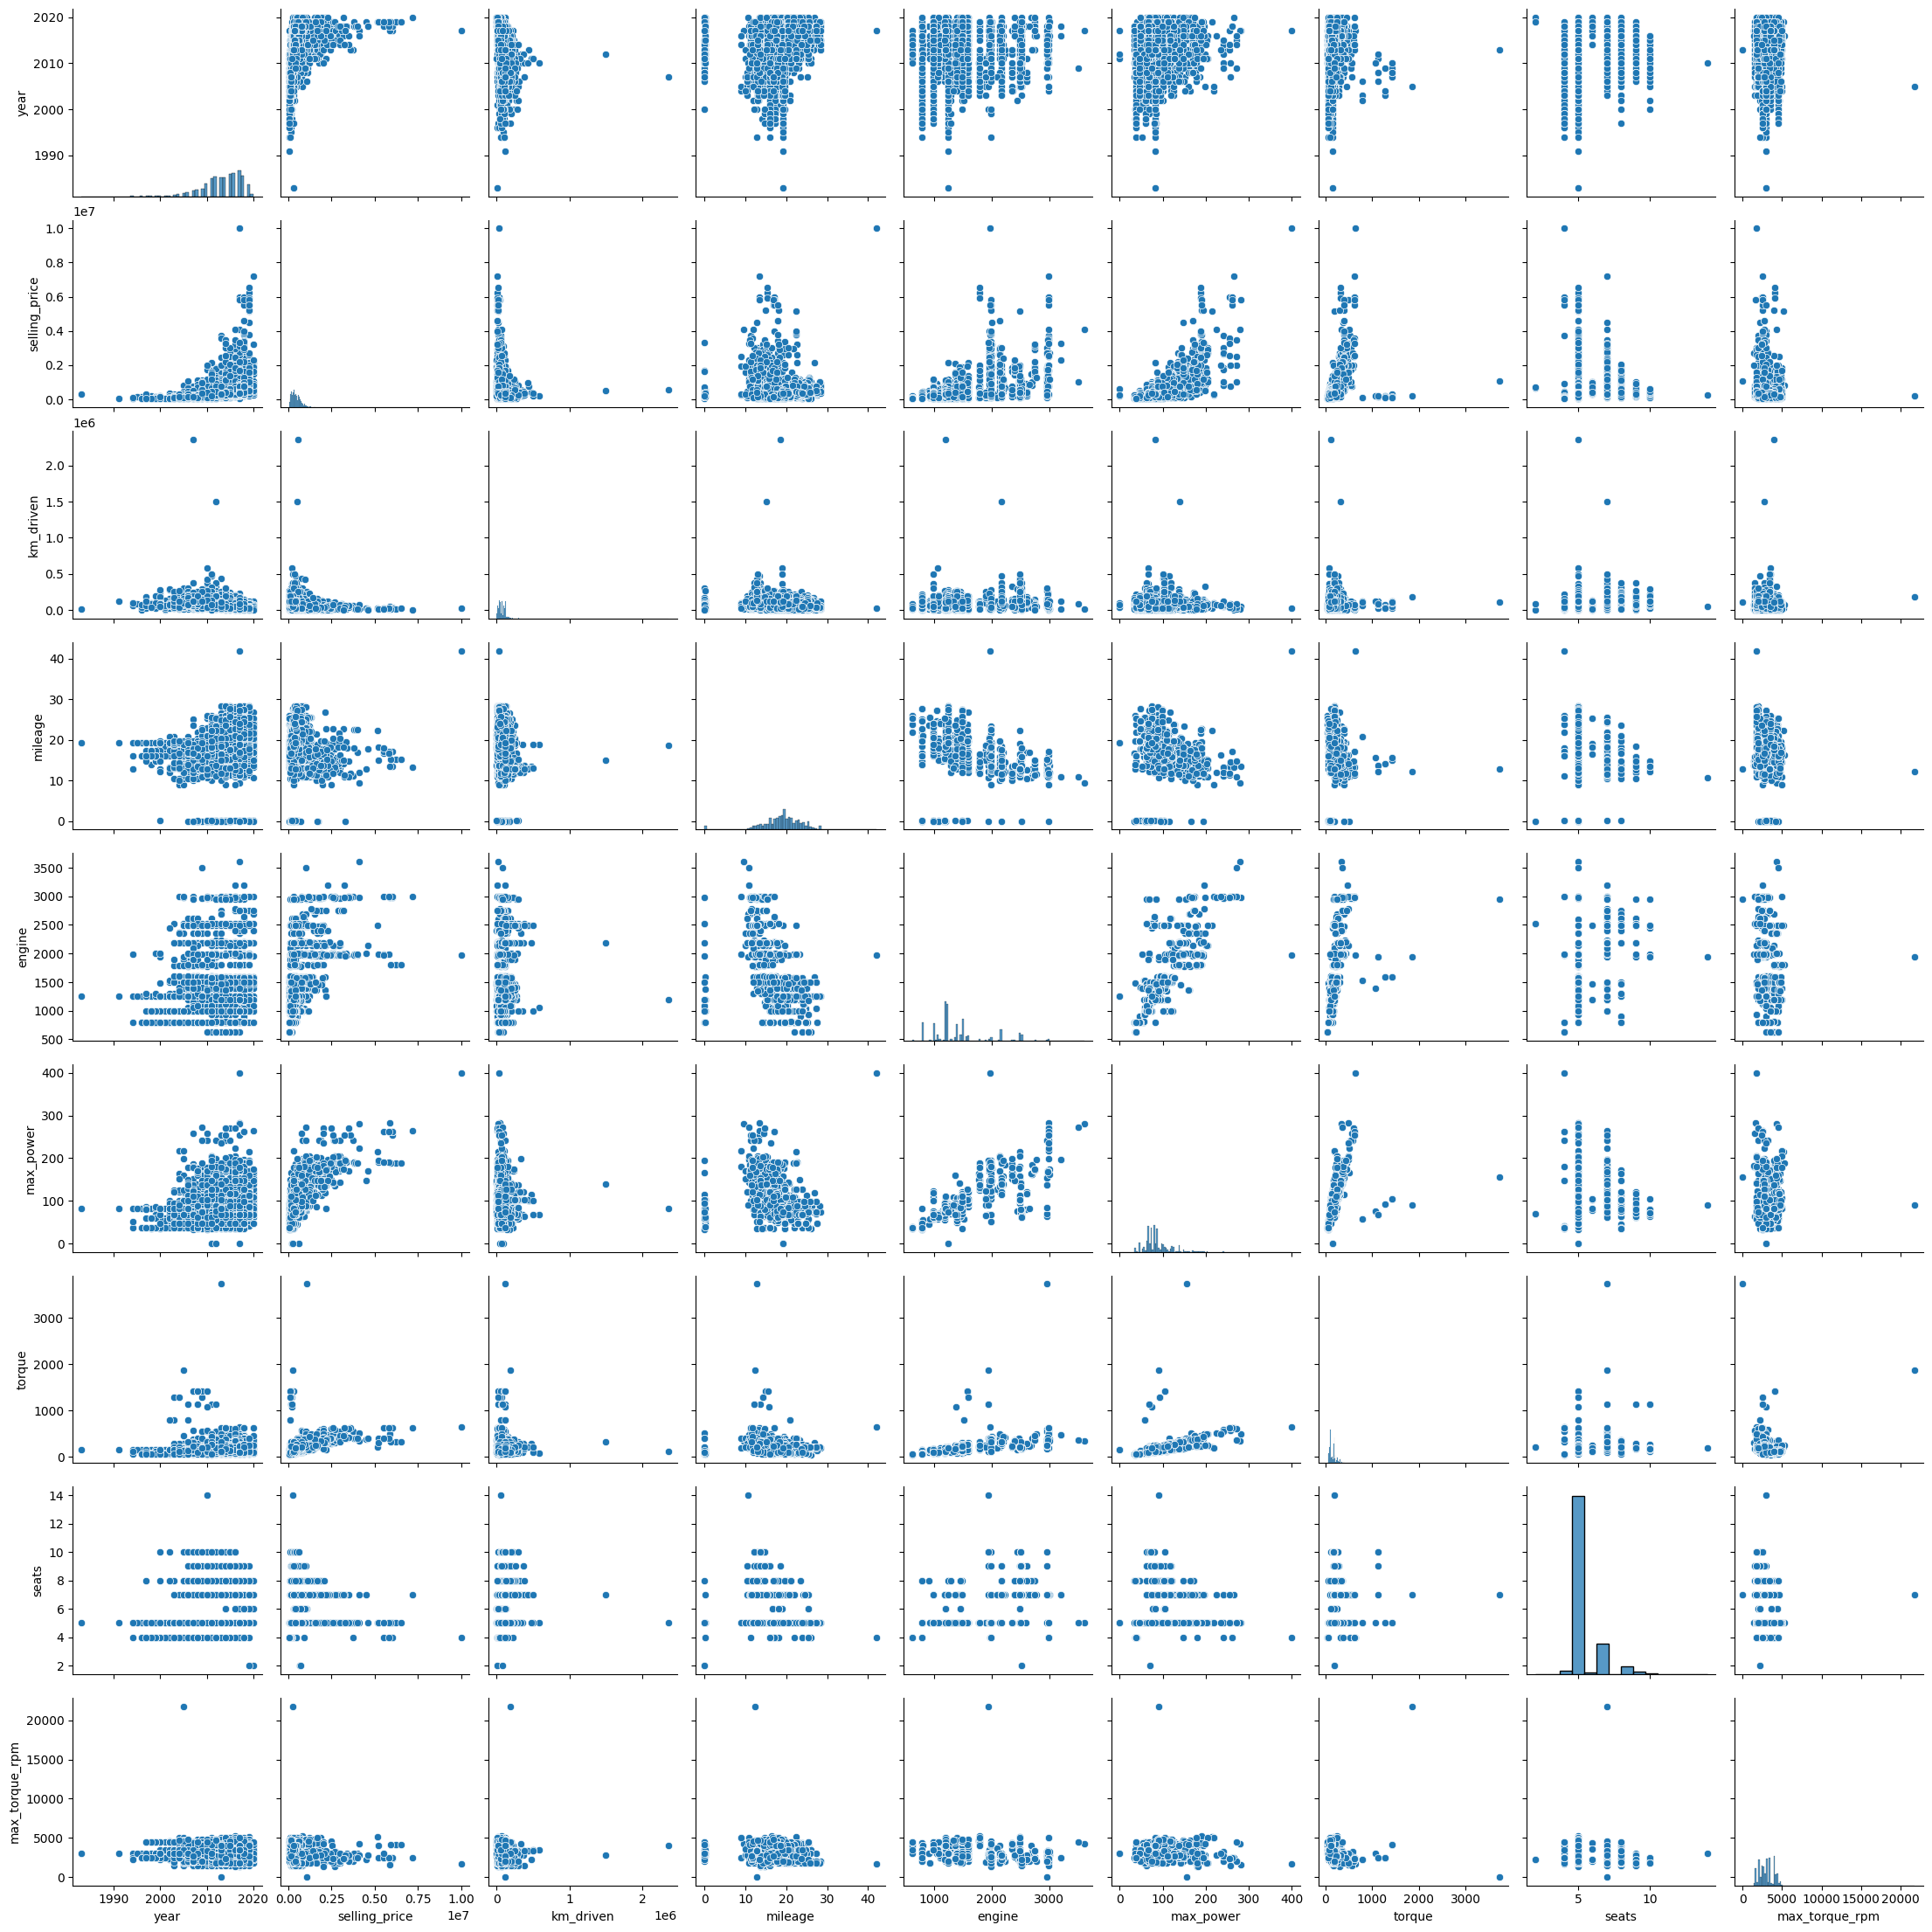

In [51]:
# your code here
sns.pairplot(df_train)

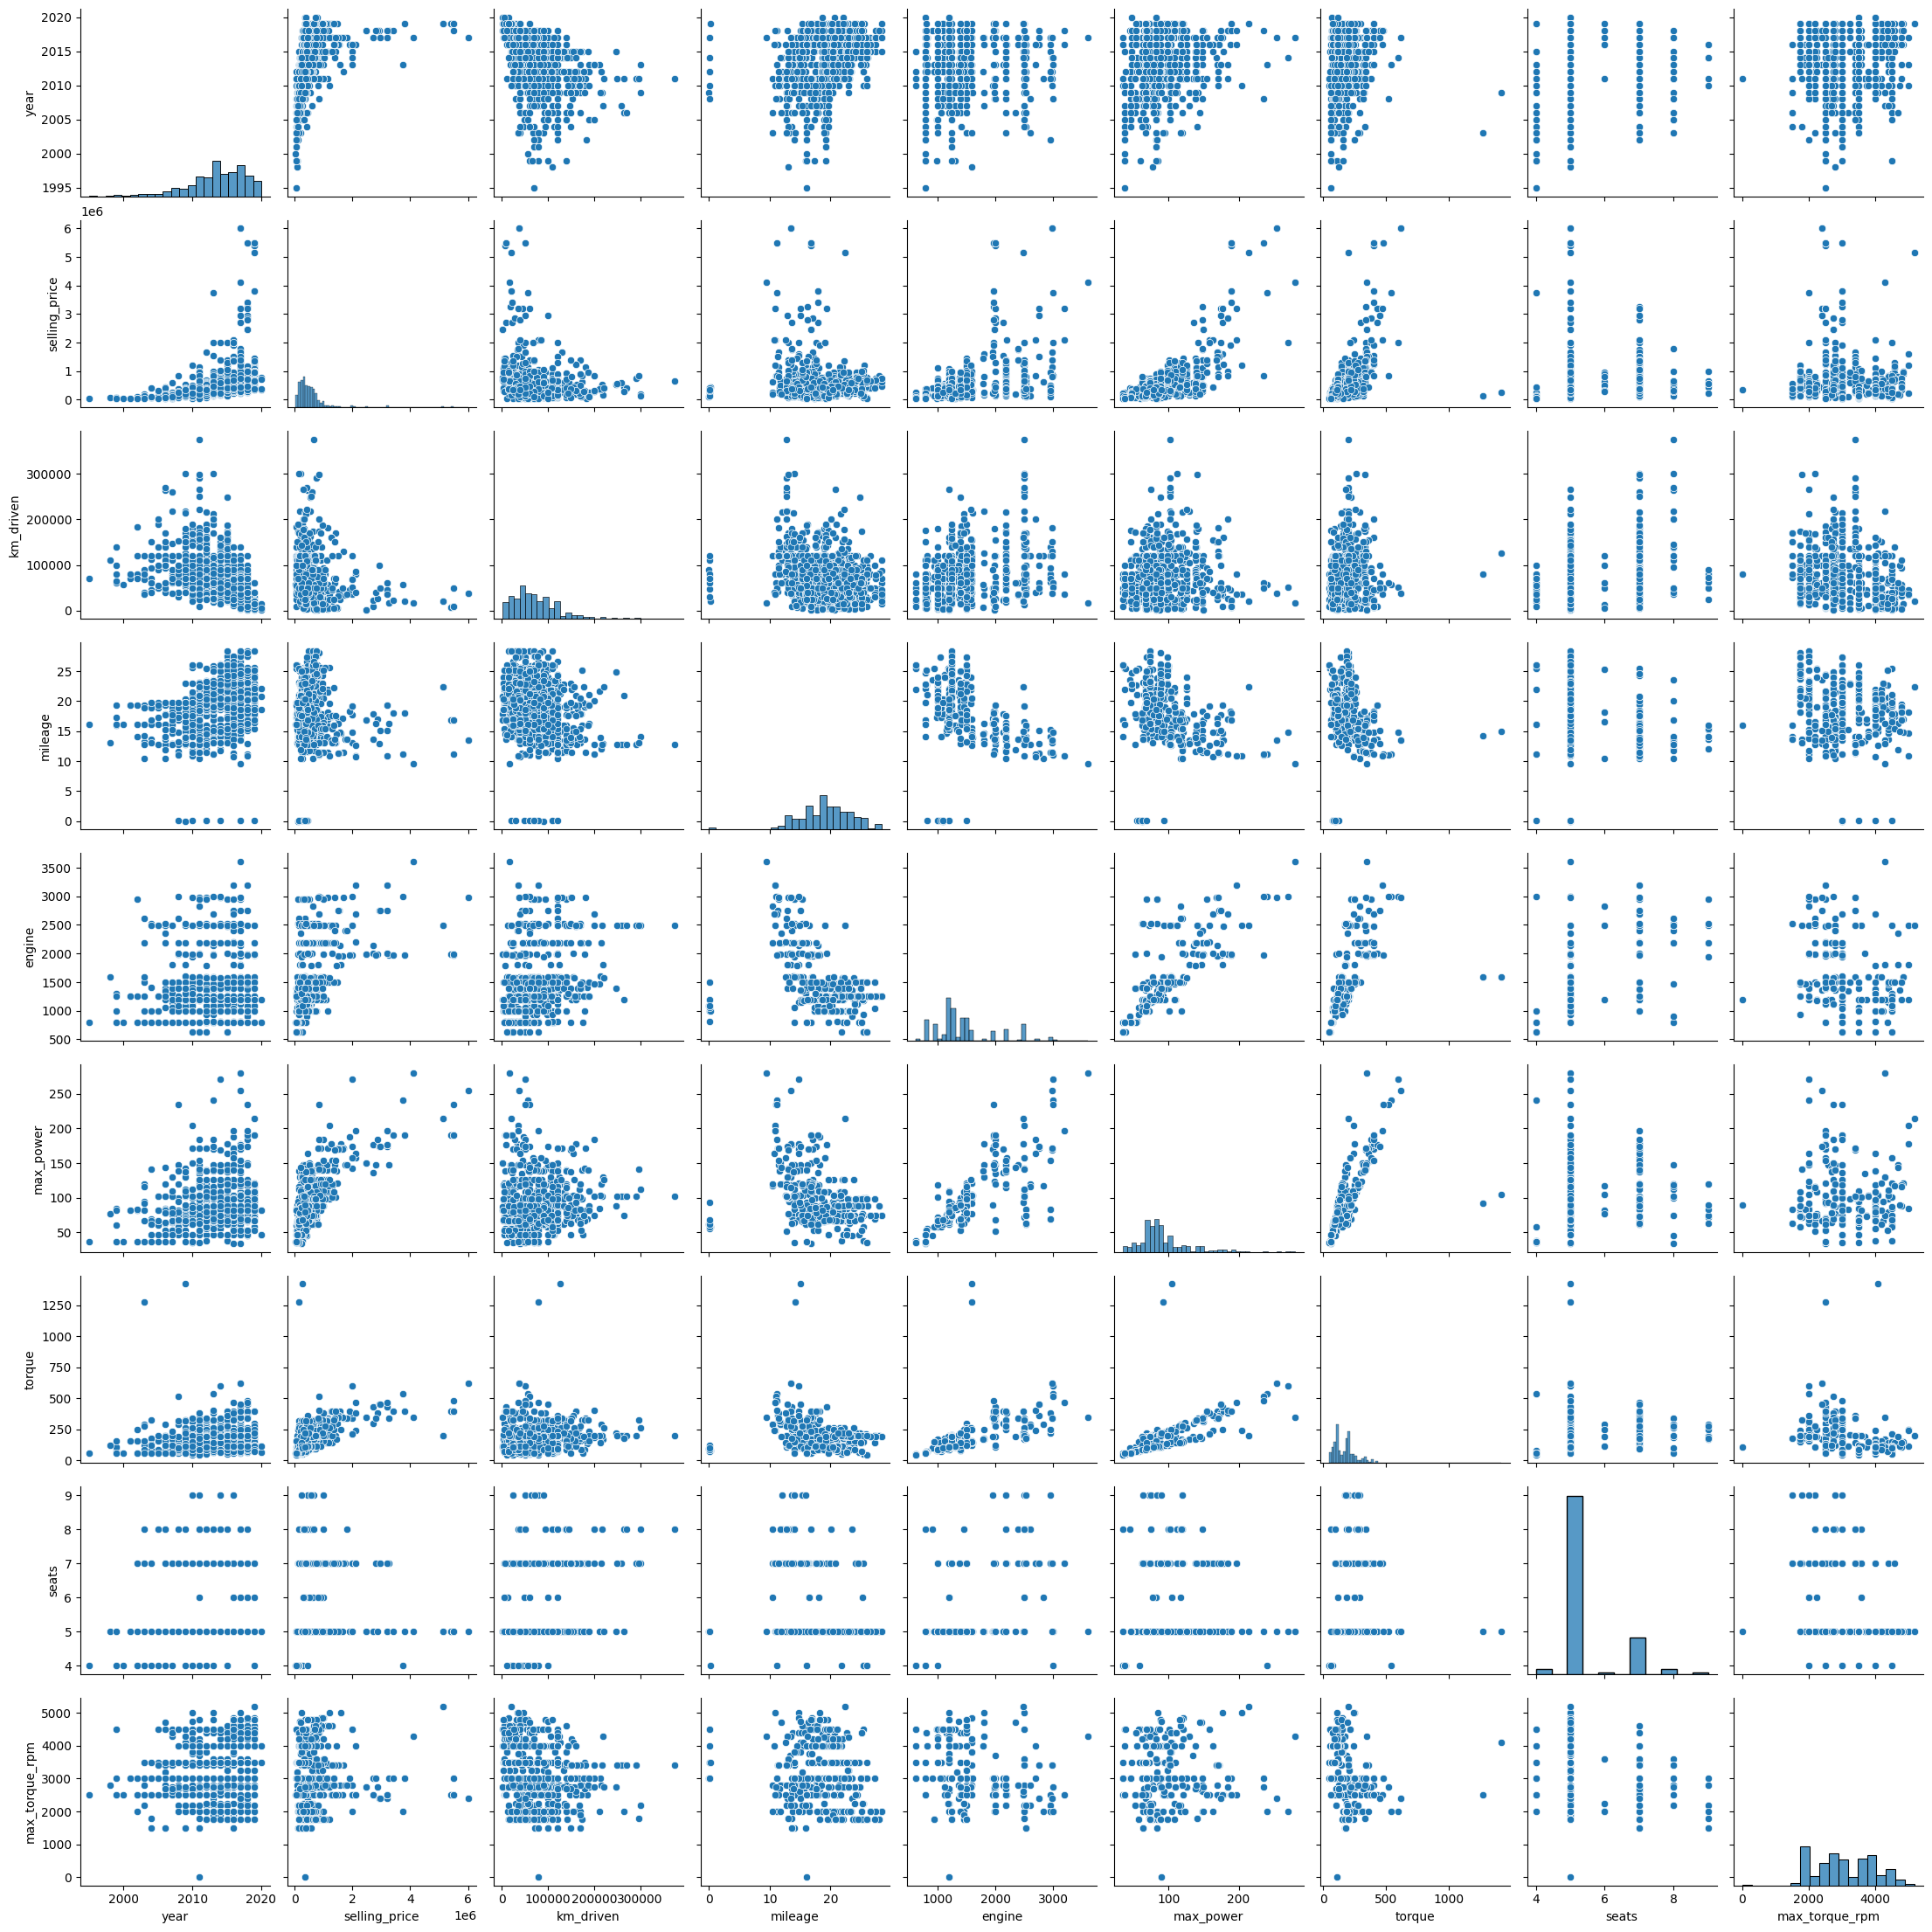

In [52]:
sns.pairplot(df_test)

> Можно выделить следующие признаки влияющие на целевую переменную selling_price
- seats - можно заметить что наибольшая цена достигается когда в автомобиле 5 мест. Сильной связи между количесвом сидений и ценой не наблюдается
- torque - чем больше тес выше цена
- max_power - чем больше мощьность тем выше стоимость автомобиля
- engine - можно сказать что чем выше номер двигателя тем больше может быть максимльная стоимость при этом сильной зависимости не наблюдается
- mileage - чем больше пробег тем меньше стоимость автомобиля
- km_driven - нельзя говорить о зависимости
- year - чем моложе автомобиль тем выше его стоимость
- max_troque_rpm - нельзя говорить о зависимости

> Можем предположить следующие гипотезы по коррелиции признаков
- year - mileage - чем больше пробег тем старше будет автомобиль
- torque - max_power - чем выше мощьность тем выше момент
- engine - mileage - чем выше номер двигателя тем меньше будет пробег
- визуально между перечисленными признаками наблюдаются взаимные корреляции

> Распределения между трейном и тестом визуально похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

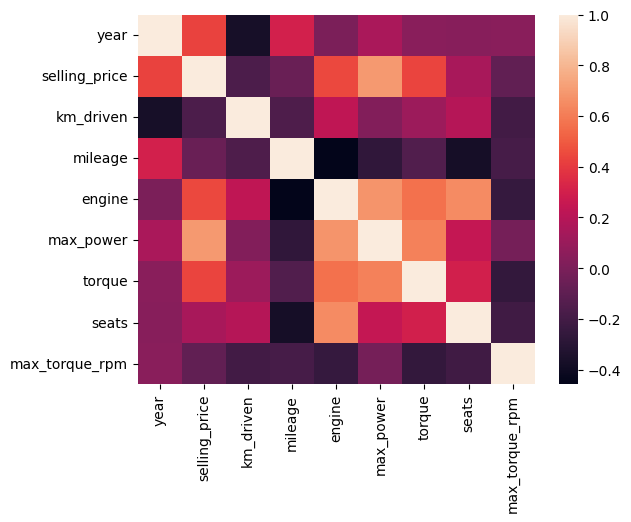

In [53]:
# your code here
corr = df_train.corr(method='pearson', numeric_only=True)
sns.heatmap(corr)

<Axes: >

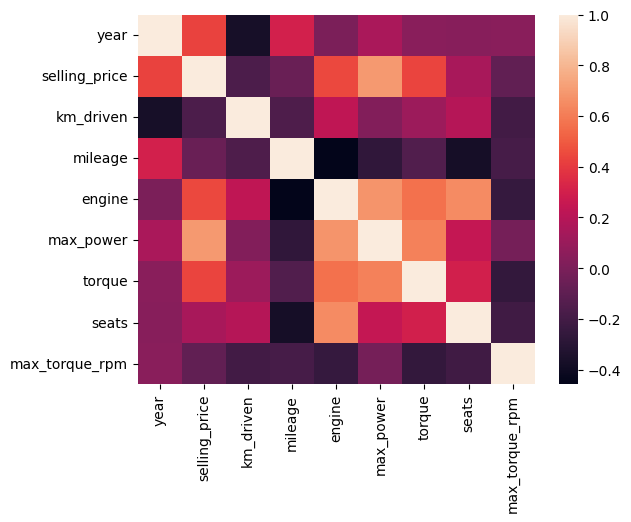

In [54]:
kendall_corr = df_train.corr(method='kendall', numeric_only=True)
sns.heatmap(corr)

<Axes: >

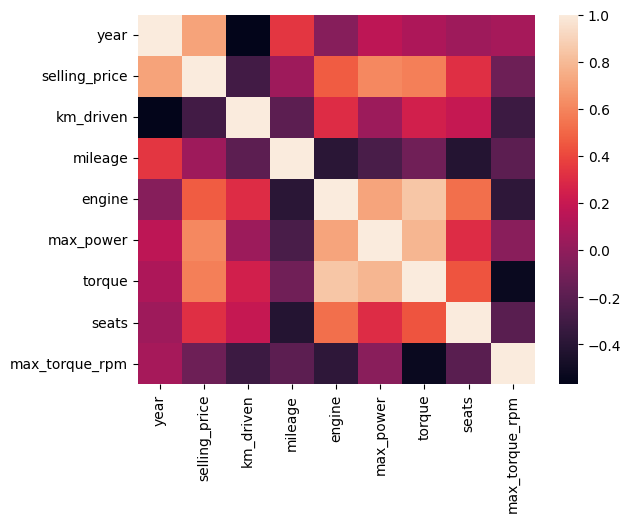

In [55]:
corr = df_train.corr(method='spearman', numeric_only=True)
sns.heatmap(corr)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

> наименьшую корреляцию имеют признаки engine и year

> наибольшая корреляция наблюдается между max_power and selling_price

> верное утверждение

> по умолчанию использовал корреляцию Пирсона как сказано в задании. Но нужно отметить, что на темпловой карте построенной по корреляции spearman температуры более выражены. Можно составить карткую справку по каждому типу корреляции:
- pearson - подразумевает линейную связь
- kendall - подразумевает монотонную связь, устойчива к выбросам и нелинейности. Рассчитывается с помощью ранга точек данных
- spearman - подразумевает монотонную связь, устойчива к выбросам и нелинейности. Рассчитывается с помощью concordant и discordant пар точек данных

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


<Axes: >

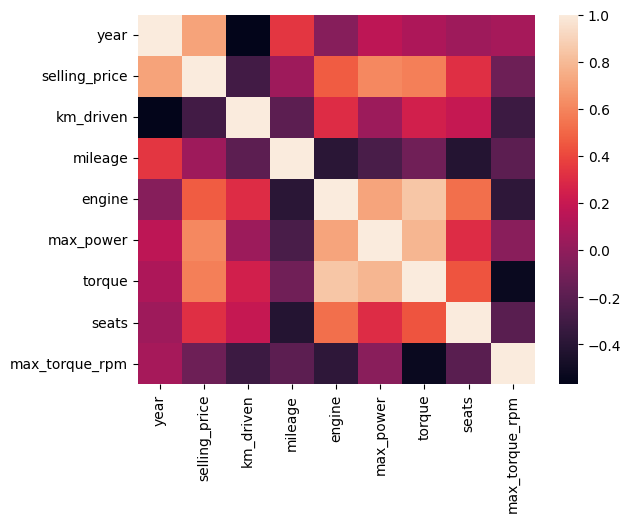

In [56]:
# your code here
def kendall(x,y):
  x = np.array(x)
  y = np.array(y)
  dx = x[:, None] - x[None, :]
  dy = y[:, None] - y[None, :]
  xy = dx * dy
  xy_uniq = np.triu(xy, 1)
  cd = np.sign(xy_uniq).sum()
  n = len(x)
  return 2 * cd / (n * (n - 1))

def kendall_matrix(df):
  columns = df.select_dtypes(include=np.number).columns
  dfo = pd.DataFrame(np.nan, columns=columns, index=columns)
  for i in columns:
    for j in columns:
      dfo.loc[i, j] = kendall(df[i], df[j])
  return dfo

#kendall(df_train['max_power'], df_train['selling_price'])
my_corr = kendall_matrix(df_train)
sns.heatmap(corr)

In [57]:
np.linalg.norm(kendall_corr - my_corr, 'fro')

np.float64(0.8069832817248628)

> Самописная реализация работает в несколько раз дольше так как написана в "лоб" без оптимизаций. Визуальное тепловые карты похожи друг на друга. Сравним матрицы корреляций с помощью вычисления нормы форобениуса по их разности. Результат получился около нуля, что говорит о том что матрицы похожи. Такое незначительное отклонение может быть вызвано погрешностью связаной с вычислением чисел с плавающей точкой.





In [58]:
!pip install phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


<Axes: >

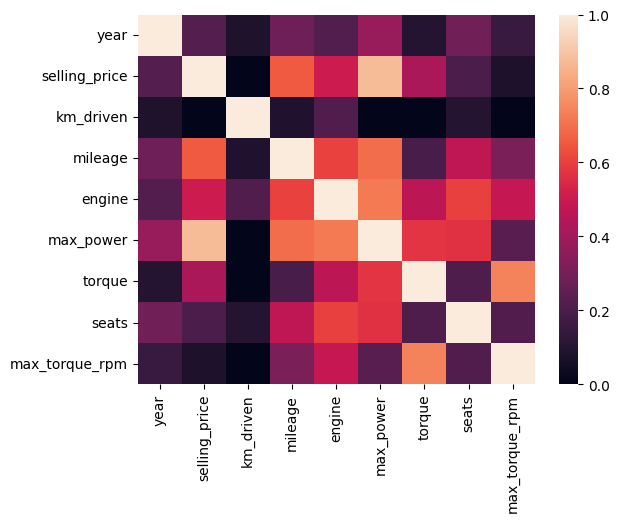

In [59]:
import phik

df_train_numeric = df_train.select_dtypes(include=np.number)
corr = df_train_numeric.phik_matrix()
sns.heatmap(corr)

> Матрица корреляций построенная с помощью phik_matrix содержит коэффициенты корреляции в предле от 0 до 1 где 0 отсутвие корреляции. Проводя визуальное сравнение с kendall, можно заметить, что большенсво элементы с нибольшей корреляцией совпадают. Числение сравнение произвести не получиться так элементы матриц в разных форматах. Если произвести нормирование величин, то сказать насколько они отличаются будет проблематично.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [60]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [61]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'engine', 'max_power', 'torque', 'seats']]

In [62]:
# опишите выбранные вещественные признаки

> Выбираем признаки которые обладают наилучшей корреляцией с целевой переменной. По анализу корреляций можно сказать что свзять между ценой и пробегом отсутвует. При этом год и пробег имеют высокую корреляцию, поэтому я думаю признак mileage можно исключить. Так же можно убрать параметр max_torque_rpm так как по распределению он сосредоточен вначале цены и плохо коррелирует со стоимостью.

In [63]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'engine', 'max_power', 'torque', 'seats']]

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, root_mean_squared_error as RMSE

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test_pred_LinearRegression = y_test_pred.copy()
y_test_LinearRegression = y_test.copy()

print("y_train mean:", y_train.mean())
print("y_test mean:", y_test.mean())
print("y_train median:", y_train.median())
print("y_test median:", y_test.median())

print()

print(f'R2 train: {r2_score(y_train, y_train_pred)}')
print(f'MSE train: {MSE(y_train, y_train_pred)}')
print(f'RMSE train: {RMSE(y_train, y_train_pred)}')
print(f'R2 test: {r2_score(y_test, y_test_pred)}')
print(f'MSE test: {MSE(y_test, y_test_pred)}')
print(f'RMSE test: {RMSE(y_test, y_test_pred)}')

y_train mean: 522960.0910958904
y_test mean: 617901.042
y_train median: 405000.0
y_test median: 434999.0

R2 train: 0.5916119601346909
MSE train: 117059669152.22655
RMSE train: 342139.8385926821
R2 test: 0.594108826737422
MSE test: 233317836872.92126
RMSE test: 483029.85091288225


Модель показывает не очень хорошие результаты (чуть выше среднего) по R2.

Использовать метрику MSE не очень хорошо интрепритруема поэтому для её описание воспользуется метрикой RMSE. Для понимания насколько больший разброс цены дает модель рядом выведем среднее значение и медиану цены по выборкам. Как мы видим RMSE, достигает значение медианы, что не очень хорошо и нужно стремиться к уменьшению этого параметра.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

$$
SS_{res} = \sum_{i}{(y_i - f_i)^2}
$$

$$
SS_{tot} = \sum_{i}{(y_i - \bar{y}_i)^2}
$$

In [65]:
def myr2(y, ypred):
  # для вычисления r2 нужно посчитать две основные компоненты
  # - residual sum of squares (SSres)
  # Считаем квадратное отлколение целевого показателя от спрогнозированного значения.
  # Можно интрепретировать как на сколько целевой показатель отличается от его спрогнозированного значения.

  # - total sum of squares (SStot)
  # Считаем квадратное отлколение целевого показателя от его среднего значение
  # Можно интрепретировать как на сколько целевой показатель далек от его среднего значения.

  # SSres/SStot - доля разброса, которую модель не смогла объяснить.
  # В лучшем случае когда модель точно прогнозирует целевую перемнную SSres = 0

  # 1 - SSres/SStot - доля разброса объясненная моделью

  # посчитаем SStot
  SStot = sum((y - y.mean())**2)

  # посчитаем SSres
  SSres = sum((y - ypred)**2)

  r2 = 1 - (SSres / SStot)
  return r2

print(f'R2 train: {r2_score(y_train, y_train_pred)}')
print(f'myR2 train: {myr2(y_train, y_train_pred)}')
print(f'R2 test: {r2_score(y_test, y_test_pred)}')
print(f'myR2 test: {myr2(y_test, y_test_pred)}')

R2 train: 0.5916119601346909
myR2 train: 0.5916119601346909
R2 test: 0.594108826737422
myR2 test: 0.594108826737422


> Обяснение дано комментариями в коде. Как мы видим результат совпал с библиотечной реализацией.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

$$
R^2 = 1 - \frac{\frac{SS_{res}}{df_{res}}}{\frac{SS_{tot}}{df_{tot}}}
$$

$$
SS_{res} = \sum_{i}{(y_i - f_i)^2}
$$

$$
SS_{tot} = \sum_{i}{(y_i - \bar{y}_i)^2}
$$

$$
df_{res} = n - p - 1
$$

$$
df_{tot} = n - 1
$$

In [66]:
# p - количево признаков используемое в модели
def myr2adj(y, ypred, p):
  # для вычисления r2 нужно посчитать две основные компоненты
  # - residual sum of squares (SSres)
  # Считаем квадратное отлколение целевого показателя от спрогнозированного значения.
  # Можно интрепретировать как на сколько целевой показатель отличается от его спрогнозированного значения.

  # - total sum of squares (SStot)
  # Считаем квадратное отлколение целевого показателя от его среднего значение
  # Можно интрепретировать как на сколько целевой показатель далек от его среднего значения.

  # SSres/SStot - доля разброса, которую модель не смогла объяснить.
  # В лучшем случае когда модель точно прогнозирует целевую перемнную SSres = 0

  # 1 - SSres/SStot - доля разброса объясненная моделью

  # посчитаем SStot
  SStot = sum((y - y.mean())**2)

  # посчитаем SSres
  SSres = sum((y - ypred)**2)

  # посчитаем dftot - степь свободы оценки дисперсии генеральной совокупности вокруг модели
  # где n - количество наблюдений
  dftot = len(y) - 1

  # посчитаем dftot - степь свободы оценки дисперсии генеральной совокупности вокруг среднего целевой переменной
  # где n - количество наблюдений
  #     p - количесво признаков
  dfres = len(y) - p - 1

  r2adj = 1 - ((SSres / dfres) / (SStot / dftot))
  return r2adj

print(f'R2 train: {myr2(y_train, y_train_pred)}')
print(f'myR2 train: {myr2adj(y_train, y_train_pred, len(X_train.columns))}')
print(f'R2 test: {myr2(y_test, y_test_pred)}')
print(f'myR2 test: {myr2adj(y_test, y_test_pred, len(X_test.columns))}')

R2 train: 0.5916119601346909
myR2 train: 0.591191879860528
R2 test: 0.594108826737422
myR2 test: 0.591656312095352


Метрика $R^2_{adj}$ применяется для анализа влияния признаков на модель. Например, мы хотим убрать несклько признаков из модели и посмотреть на сколько изменяться результаты модели. Эта метрика хорошо подходит для детекции признаков, которые незначительно влияют на результат моделирования так, как стандратная метрика $R^2$ будет показыват одинаковые результаты.

Обучим еще одну модель куда добавим признак mileage и посмотрим на эти метрики

In [67]:
y_train_r2adj = df_train['selling_price']
X_train_r2adj = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']]

y_test_r2adj = df_test['selling_price']
X_test_r2adj = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']]

model = LinearRegression()
model.fit(X_train_r2adj, y_train_r2adj)
y_test_pred_r2adj = model.predict(X_test_r2adj)

print(f'myR2 test: {myr2(y_test_r2adj, y_test_pred_r2adj)}')
print(f'myR2adj test: {myr2adj(y_test_r2adj, y_test_pred_r2adj, len(X_test_r2adj.columns))}')

myR2 test: 0.5940297873553815
myR2adj test: 0.5911650781935747


Как мы видим метрика $R^2$ изменилась ~1e-4 в то время как $R^2_{adj}$ изменилась на ~5e-4.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, root_mean_squared_error as RMSE

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test_pred_LinearRegression_Scaler = y_test_pred.copy()
y_test_LinearRegression_Scaler = y_test.copy()

print(f'R2 train: {r2_score(y_train, y_train_pred)}')
print(f'MSE train: {MSE(y_train, y_train_pred)}')
print(f'RMSE train: {RMSE(y_train, y_train_pred)}')
print(f'R2 test: {r2_score(y_test, y_test_pred)}')
print(f'MSE test: {MSE(y_test, y_test_pred)}')
print(f'RMSE test: {RMSE(y_test, y_test_pred)}')

coefs = pd.Series(model.coef_, index=X_train.columns)
coefs = abs(coefs).sort_values(ascending=False)
print("coefs:\n", coefs)

R2 train: 0.5916119601346905
MSE train: 117059669152.22662
RMSE train: 342139.8385926822
R2 test: 0.5941088267374269
MSE test: 233317836872.91843
RMSE test: 483029.85091287934
coefs:
 max_power    309199.569964
year         164862.479544
engine        46282.418965
km_driven     42043.234037
seats         30255.515286
torque        20706.230391
dtype: float64


Как мы видим наибольший вклад оказывает признак `max_power`. На втором месте `year`.

Можем заметить, что нормализацая не оказала сущевственого влияния на качество результата прогнозирования

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

Обучение

Так как мы уже удалили признак которые потенциально мог бы быть занулен L1 решулязирацией, то добавим его и обучим модель на этом датасете. Датасет был создан ранее *_r2adj. Примем к нему нормирование признаков

In [70]:
scaler = StandardScaler()
scaler.fit(X_train_r2adj)
X_train_r2adj = pd.DataFrame(scaler.transform(X_train_r2adj), columns=X_train_r2adj.columns)
X_test_r2adj = pd.DataFrame(scaler.transform(X_test_r2adj), columns=X_test_r2adj.columns)

In [71]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0, random_state=kRandomState)
model.fit(X_train_r2adj, y_train_r2adj)
y_train_pred_r2adj = model.predict(X_train_r2adj)
y_test_pred_r2adj = model.predict(X_test_r2adj)

y_test_pred_Lasso = y_test_pred_r2adj.copy()
y_test_Lasso = y_test_r2adj.copy()

print(f'R2 train: {r2_score(y_train_r2adj, y_train_pred_r2adj)}')
print(f'MSE train: {MSE(y_train_r2adj, y_train_pred_r2adj)}')
print(f'RMSE train: {RMSE(y_train_r2adj, y_train_pred_r2adj)}')
print(f'R2 test: {r2_score(y_test_r2adj, y_test_pred_r2adj)}')
print(f'MSE test: {MSE(y_test_r2adj, y_test_pred_r2adj)}')
print(f'RMSE test: {RMSE(y_test_r2adj, y_test_pred_r2adj)}')

coefs = pd.Series(model.coef_, index=X_train_r2adj.columns)
coefs = abs(coefs).sort_values(ascending=True)
print("coefs:\n", coefs)

R2 train: 0.5918898008574693
MSE train: 116980029349.12115
RMSE train: 342023.4339180887
R2 test: 0.5940286352618914
MSE test: 233363933222.97504
RMSE test: 483077.56439621066
coefs:
 mileage       10968.895545
torque        18802.585215
seats         28142.781438
km_driven     42791.456129
engine        49985.019446
year         161012.674777
max_power    310954.563110
dtype: float64


При значение параметра alpha=1 никакого зануления не происходит. Это говорит о том, что все признаки вносят вклад в целевую переменную. Так же модели передается малое количество признаков, возможно еслибы признаков были десятки или сотни, то результат был бы интереснее.

При анализе распределений я выдвигал гипотезу, что признак mileage не вносить существенного влияния на целевую переммную. Значене коэфицента этого признака минимально, что подтверждает гипотезу.

При значении параметра alpha=10000. Зануляются два признака это mileage и seats. Интересно то, что при этом значении занулился признак `seats`. Скорее всего это связано с тем, что это категориальный признак у которого нет выраженной зависимости с какой-то одной категорией и стоимость сильно варьируется внутри одной категории.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

Для кросс-валидации нам нужно будет применять нормальзацию для каждого фола, поэтому создадим pipeline и загрузим в датасеты сырые данные. Для того чтобы можно было сравнить результаты Lasso and ElasticNet выполним ручную разбивку на фолды с помощью KFold

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold

y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'engine', 'max_power', 'torque', 'seats']]

y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'engine', 'max_power', 'torque', 'seats']]

pipeLasso = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ('lasso', Lasso(random_state=kRandomState))
])

param_grid = {
    'lasso__alpha': np.logspace(-5, 10, 50)
}

kfold = KFold(n_splits=10)
grid = GridSearchCV(pipeLasso, param_grid, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(pd.Series(grid.best_estimator_.named_steps['lasso'].coef_, index=X_train.columns))

{'lasso__alpha': np.float64(30888.43596477485)}
0.5739932954482703
year         143505.828033
km_driven    -12224.310234
engine            0.000000
max_power    317825.060717
torque            0.000000
seats            -0.000000
dtype: float64


In [73]:
kfold_shuffled = KFold(n_splits=10, shuffle=True, random_state=kRandomState)
grid = GridSearchCV(pipeLasso, param_grid, cv=kfold_shuffled, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(pd.Series(grid.best_estimator_.named_steps['lasso'].coef_, index=X_train.columns))

{'lasso__alpha': np.float64(1842.0699693267163)}
0.5880111515263646
year         163090.842243
km_driven    -40286.006078
engine        39054.602338
max_power    311826.991883
torque        19442.128298
seats        -24229.233090
dtype: float64


Если мы не только разделим данные на фолды, но и перемашаем их, то получим более хорошие результаты при этом зануления коэффиценов не происходит. Из этого можно сделать вывод, что в фолдах без перемешивания присутвуют какие-то зависимости, которые негативно влияют на качетво модели.

Ответим на вопросы:

> на каждый параметр грид-серч обучает отдельную модель. Для параметра alpha мы подбираем 50 значений и каждого значения мы проходим по каждому фолду, их всего 10. В итоге грид-серчу нужно будет обучить 50*10=500 моделей.

> Lasso регрессия не обладает большим количеством гиперпараметров для настройки, у ней есть параметр alpha, которые задает констрнту на которую умножается L1 term. Чем больше этот коэффициент, тем сильнее регулиризация и тем больше коэффициентов будет зануляться.

> Для ответа на вопрос рассматриваем выборку без перемешивания. В таком случае занулились 3 коэффициента: `engine`, `torque`, `seats`. Лучшим коэффициентом является `max_power`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [74]:
from sklearn.linear_model import ElasticNet

pipeElastic = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ('elasticnet', ElasticNet(random_state=kRandomState))
])

param_grid = {
    'elasticnet__alpha': np.logspace(-2, 8, 10),
    'elasticnet__l1_ratio': np.logspace(0, 1, 10) / 10,
}

grid = GridSearchCV(pipeElastic, param_grid, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(pd.Series(grid.best_estimator_.named_steps['elasticnet'].coef_, index=X_train.columns))

{'elasticnet__alpha': np.float64(0.1291549665014884), 'elasticnet__l1_ratio': np.float64(0.16681005372000587)}
0.5740877509402638
year         153687.466270
km_driven    -45863.936257
engine        64028.931615
max_power    260570.418425
torque        37603.554933
seats        -30516.484206
dtype: float64


In [75]:
grid = GridSearchCV(pipeElastic, param_grid, cv=kfold_shuffled, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(pd.Series(grid.best_estimator_.named_steps['elasticnet'].coef_, index=X_train.columns))

{'elasticnet__alpha': np.float64(0.1291549665014884), 'elasticnet__l1_ratio': np.float64(0.7742636826811269)}
0.5884692826413813
year         161912.359490
km_driven    -43557.466220
engine        53841.782595
max_power    292786.377100
torque        26462.534095
seats        -31561.814765
dtype: float64


In [76]:
model = ElasticNet(alpha=0.1291549665014884, l1_ratio=0.7742636826811269, random_state=kRandomState)
model.fit(X_train, y_train)

y_train_pred_ElasticNet = model.predict(X_train)
y_test_pred_ElasticNet = model.predict(X_test)

y_test_ElasticNet = y_test.copy()

print(f'R2 train: {r2_score(y_train, y_train_pred_ElasticNet)}')
print(f'MSE train: {MSE(y_train, y_train_pred_ElasticNet)}')
print(f'RMSE train: {RMSE(y_train, y_train_pred_ElasticNet)}')
print(f'R2 test: {r2_score(y_test, y_test_pred_ElasticNet)}')
print(f'MSE test: {MSE(y_test, y_test_pred_ElasticNet)}')
print(f'RMSE test: {RMSE(y_test, y_test_pred_ElasticNet)}')

R2 train: 0.5916059914353061
MSE train: 117061380010.30034
RMSE train: 342142.33881573373
R2 test: 0.5938748230606796
MSE test: 233452348868.43716
RMSE test: 483169.0686172255


> в ElasticNet осущесвляется подбор двух параметров, где для каждого параметра педается по 10 значений. Всего будет обучено 10 * 10 * 10 = 1000 моделей

> лучшиие параметры
- alpha = 0.1291549665014884. Говорит о том, что L1 штраф почти не используется
- l1_ration = 0.16681005372000587. Говорит о том в большей степени исопльзуется L2 регуляризация

> Учитывая низкие значения параметров для ElasticNet можно сказать что в основном исопльзуется Ridge регрессия.(L1 штраф мало влияет на результат)


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



> В дз по матимате нужно было реализовать градиентный спуск и получается его реализацию можно применить для решения этой задачи

> При вычислении градиента L0 не дифференцируется. Наверно это является причиной почему его нет в стандартных библиотеках. После долгих посисков.. Было найдена библотека L0Learn в которой это реализовано с помощью coordinate descent. Применить эту библиотеку слишком легкий путь. Первым что приходит на ум и самым простым вариантом решения этой проблемы является игнорирование L0 при поиске градиента. Но тогда не будет штрафа... Тут я уже решил обраться за помощью к Сэму и он подсказал вместно L0 занулять веся готорые будут меньше beta. Это решения я попробую реализовать и сравнить с решением из библиотеки

In [77]:
# your code here
class L0Regression():
  def __init__(self, n_iter = 100, eta = 0.05, alpha = 1, tau = 1e-8):
    self.n_iter = n_iter
    self.eta = eta
    self.alpha = alpha
    self.tau = tau
    self.w = None
    self.errors = []

  def loss(self, X, y, w):
    mse = (np.linalg.norm(y - X @ w) ** 2) / len(y)
    l0 = np.count_nonzero(w)
    return mse + self.alpha * l0

  def grad(self, X, y, w):
    return 2 * X.T @ (X @ w - y) / len(y)

  def fit(self, X, y):
    w = np.zeros(X.shape[1])
    for i in range(self.n_iter):
      w = w - self.eta * self.grad(X, y, w)
      w[np.abs(w) < self.tau] = 0
      self.errors.append(self.loss(X, y, w))
    self.w = w

  def predict(self, X):
    return X @ self.w

model = L0Regression(500, 1e-10, 1, 1e-2)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(model.w)

print(f'R2 train: {r2_score(y_train, y_train_pred)}')
print(f'MSE train: {MSE(y_train, y_train_pred)}')
print(f'RMSE train: {RMSE(y_train, y_train_pred)}')
print(f'R2 test: {r2_score(y_test, y_test_pred)}')
print(f'MSE test: {MSE(y_test, y_test_pred)}')
print(f'RMSE test: {RMSE(y_test, y_test_pred)}')


year         44.720176
km_driven     2.428176
engine       40.766540
max_power     3.083600
torque        6.305692
seats         0.000000
dtype: float64
R2 train: -0.2661453513128187
MSE train: 362925799619.8689
RMSE train: 602433.23249956
R2 test: -0.22316839607720373
MSE test: 703112122419.6516
RMSE test: 838517.8128219171


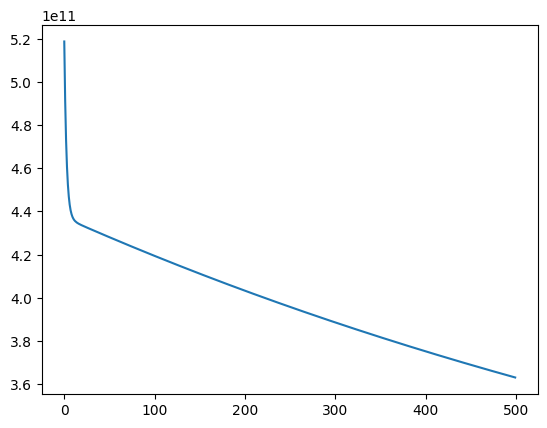

In [78]:
plt.plot(model.errors)

In [79]:
!pip install l0learn

ERROR: Could not find a version that satisfies the requirement l0learn (from versions: none)
ERROR: No matching distribution found for l0learn


Пакет l0learn не устанавливать в колабе (ಥ﹏ಥ). Сравнить мою реализацию не с чем сравнить. Получился интереный опыт реализации и узнал много интересного.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Я предполагаю, что ассерт устанвлен на количество стоблцов до разделения столюца name? Поэтому возью данных из df_train и уберу все колонки убранные в предыдущей части.

In [80]:
# your code here
X_train_cat = df_train.drop(columns=['mileage', 'max_torque_rpm', 'selling_price'], axis=1)

X_test_cat = df_test.drop(columns=['mileage', 'max_torque_rpm', 'selling_price'], axis=1)

In [81]:
assert X_train_cat.shape == (5840, 11)

In [82]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [83]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
pd.DataFrame(X_train_cat['name'].value_counts())

count
name                               
Maruti Swift Dzire VDI           91
Maruti Alto 800 LXI              58
Maruti Alto LXi                  56
Maruti Swift VDI                 48
Maruti Swift VDI BSIV            47
...                             ...
Hyundai Santa Fe 4x4 AT           1
Tata New Safari Dicor VX 4X2      1
Maruti Baleno Alpha Diesel        1
Maruti 800 DX BSII                1
Hyundai i20 Sportz Diesel         1

[1924 rows x 1 columns]

Посмотрев на значение в колонке `name` можно сказать что значение состоит из следующих параметров: марка, модель, модификаци, доп опции..
Делать полноценный парсинг этого столюца долго, так как марка или модель можешь состоять из нескольких слов. Поэто сделаем так:

Первое слово будем использовать в качетсве марки. Второе слово будет моделью. При таком разбиении происходит потеря точности, но это решее будет лучше чем для использовать name как одону колонку.

In [84]:
X_train_cat['model'] = X_train_cat['name'].str.split().str[1]
X_train_cat['brand'] = X_train_cat['name'].str.split().str[0]
X_train_cat = X_train_cat.drop('name', axis=1)

X_test_cat['model'] = X_test_cat['name'].str.split().str[1]
X_test_cat['brand'] = X_test_cat['name'].str.split().str[0]
X_test_cat = X_test_cat.drop('name', axis=1)

X_test_cat = X_test_cat[X_test_cat['brand'].isin(X_train_cat['brand'].unique())
              & X_test_cat['model'].isin(X_train_cat['model'].unique())]

y_train_cat = df_train.loc[df_train.index.isin(X_train_cat.index), 'selling_price']
y_test_cat = df_test.loc[df_test.index.isin(X_test_cat.index), 'selling_price']

X_test_cat = X_test_cat.reset_index(drop=True)

In [85]:
export_brands = X_train_cat['brand'].unique()
export_models = X_train_cat['model'].unique()

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [86]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

enc = OneHotEncoder(drop='first', sparse_output=False)
columns = ['model', 'brand', 'owner', 'transmission', 'seller_type', 'fuel', 'seats']

coded = enc.fit_transform(X_train_cat[columns])
X_train_cat = pd.concat([X_train_cat.drop(columns=columns, axis=1), pd.DataFrame(coded, columns=enc.get_feature_names_out(columns))], axis=1)


coded_test = enc.transform(X_test_cat[columns])
X_test_cat = pd.concat([X_test_cat.drop(columns=columns, axis=1), pd.DataFrame(coded_test, columns=enc.get_feature_names_out(columns))], axis=1)

In [87]:
print(X_train_cat[X_train_cat.isnull().any(axis=1)])

Empty DataFrame
Columns: [year, km_driven, engine, max_power, torque, model_309, model_5, model_6, model_7, model_800, model_A-Star, model_A3, model_A4, model_A6, model_Accent, model_Accord, model_Alto, model_Amaze, model_Ameo, model_Aria, model_Aspire, model_Aveo, model_Avventura, model_B, model_BR-V, model_BRV, model_Baleno, model_Beat, model_Bolero, model_Bolt, model_Brio, model_CLA, model_CLASSIC, model_CR-V, model_Camry, model_Captiva, model_Captur, model_Celerio, model_Ciaz, model_City, model_Civic, model_Classic, model_Compass, model_Corolla, model_Creta, model_CrossPolo, model_Cruze, model_D-Max, model_Duster, model_Dzire, model_E-Class, model_EON, model_ES, model_EcoSport, model_Ecosport, model_Eeco, model_Elantra, model_Elite, model_Endeavour, model_Enjoy, model_Ertiga, model_Estate, model_Esteem, model_Estilo, model_Etios, model_Fabia, model_Fiesta, model_Figo, model_Fluence, model_Fortuner, model_Freestyle, model_Fusion, model_GL-Class, model_GLA, model_GLC, model_GO, model

In [88]:
print(X_test_cat[X_test_cat.isnull().any(axis=1)])

Empty DataFrame
Columns: [year, km_driven, engine, max_power, torque, model_309, model_5, model_6, model_7, model_800, model_A-Star, model_A3, model_A4, model_A6, model_Accent, model_Accord, model_Alto, model_Amaze, model_Ameo, model_Aria, model_Aspire, model_Aveo, model_Avventura, model_B, model_BR-V, model_BRV, model_Baleno, model_Beat, model_Bolero, model_Bolt, model_Brio, model_CLA, model_CLASSIC, model_CR-V, model_Camry, model_Captiva, model_Captur, model_Celerio, model_Ciaz, model_City, model_Civic, model_Classic, model_Compass, model_Corolla, model_Creta, model_CrossPolo, model_Cruze, model_D-Max, model_Duster, model_Dzire, model_E-Class, model_EON, model_ES, model_EcoSport, model_Ecosport, model_Eeco, model_Elantra, model_Elite, model_Endeavour, model_Enjoy, model_Ertiga, model_Estate, model_Esteem, model_Estilo, model_Etios, model_Fabia, model_Fiesta, model_Figo, model_Fluence, model_Fortuner, model_Freestyle, model_Fusion, model_GL-Class, model_GLA, model_GLC, model_GO, model

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

- OHE нужно обучать на трейне и применять к трейну и к тесту
- избавиться от линейной зависимости. При удалении одного столбца мы не теряеем в данных, так как значение удаленного столбца можно понять из оставшихся.
- Нет, нужно проводить дополнительные проверки. Так как не смотря на малывае признак может быть значимым. На лекции приводился пример с фруктами.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pipeElastic = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ('ridge', Ridge(random_state=kRandomState))
])

param_grid = {
    'ridge__alpha': np.logspace(-2, 8, 10),
}

grid = GridSearchCV(pipeElastic, param_grid, cv=kfold, scoring='r2')
grid.fit(X_train_cat, y_train_cat)
print(grid.best_params_)
print(grid.best_score_)
#print(pd.Series(grid.best_estimator_.named_steps['ridge'].coef_, index=X_train_cat.columns))

{'ridge__alpha': np.float64(278.2559402207126)}
0.7707084564673258


In [90]:
model = Ridge(alpha=278.2559402207126)
model.fit(X_train_cat, y_train_cat)
y_train_pred = model.predict(X_train_cat)
y_test_pred = model.predict(X_test_cat)

print(f'R2 train: {r2_score(y_train_cat, y_train_pred)}')
print(f'MSE train: {MSE(y_train_cat, y_train_pred)}')
print(f'RMSE train: {RMSE(y_train_cat, y_train_pred)}')
print(f'R2 test: {r2_score(y_test_cat, y_test_pred)}')
print(f'MSE test: {MSE(y_test_cat, y_test_pred)}')
print(f'RMSE test: {RMSE(y_test_cat, y_test_pred)}')

R2 train: 0.6784954857653785
MSE train: 92155519734.77138
RMSE train: 303571.27620177006
R2 test: 0.6797245211478116
MSE test: 173595823741.4673
RMSE test: 416648.32141923637


По метрикам качетсов модели улучшилось, несмотра на то что в данных отсутствует нормализация. Добавления категориальных признаков сказалось положительно. В следующей части проведем нормализацию этих данных и посмотрим, насколько возрастут метрики, а также добавим дополнительные признаки.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [91]:
X_train = X_train_cat.copy()
X_test = X_test_cat.copy()
y_train = y_train_cat.copy()
y_test = y_test_cat.copy()

Задание 1

In [92]:
def GenFeatures(df):
  df['year2'] = df['year']**2
  df['engine2'] = df['engine']**2
  df['torque_log'] = np.log(df['torque'])

  df['age'] = 2025 - df['year']
  df['age2'] = df['age']**2

  # модешь обучается в негативный r2
  #df['km_drive_power'] = df['max_power'] / df['km_driven']
  #df['km_drive_torque'] = df['torque'] / df['km_driven']
  #df['km_drive_engine'] = df['engine'] / df['km_driven']
  df['power_per_volue'] = df['max_power'] / df['engine']
  df['torque_per_volue'] = df['torque'] / df['engine']
  df['torque+power'] = df['torque'] * df['max_power']

GenFeatures(X_train)
GenFeatures(X_test)

Можно было бы посчитать больше признаков, особенно по тем которые сами по себе не вносили вклада в модель. Например, средний пробег в год и т.д...

Задание 2

In [93]:
# Парсинг поля name я реализовал в рамках предыдущей части. Имя разделяется на марку и модель и по этим колонкам запускается OHE
def AddNewFeatures(df):
  # этим нужно было заниматься раньше. Сейчас данные находятся в не очень удачном формате
  df['good_choice'] = ((df['seller_type_Individual'] == 1) & (df['owner_Fourth & Above Owner'] == 0)
      & (df['owner_Test Drive Car'] == 0) & (df['owner_Third Owner'] == 0))

AddNewFeatures(X_train)
AddNewFeatures(X_test)

Задание 3

<Axes: xlabel='year'>

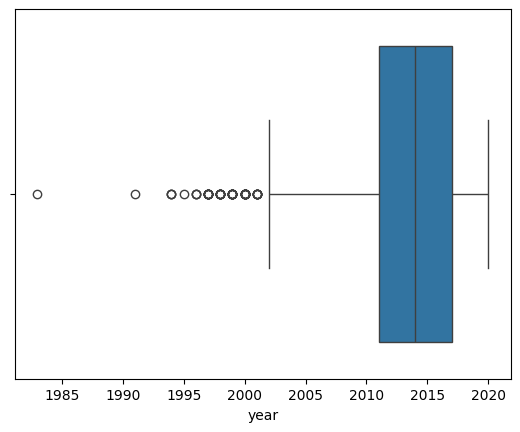

In [94]:
sns.boxplot(x=X_train['year'])

<Axes: xlabel='max_power'>

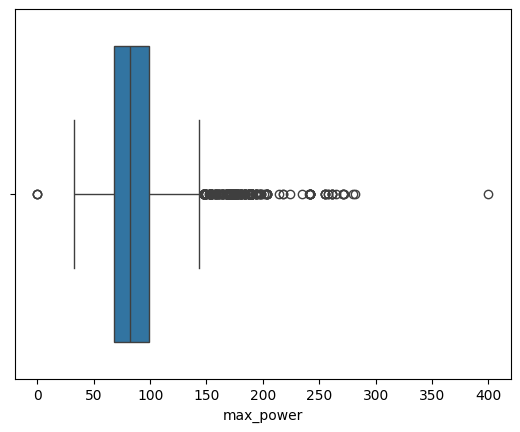

In [95]:
sns.boxplot(x=X_train['max_power'])

<Axes: xlabel='km_driven'>

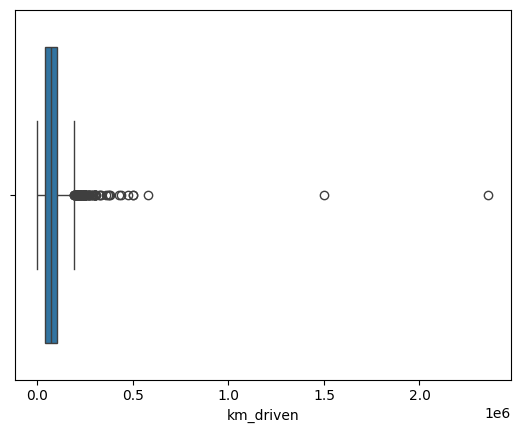

In [96]:
sns.boxplot(x=X_train['km_driven'])

<Axes: xlabel='torque'>

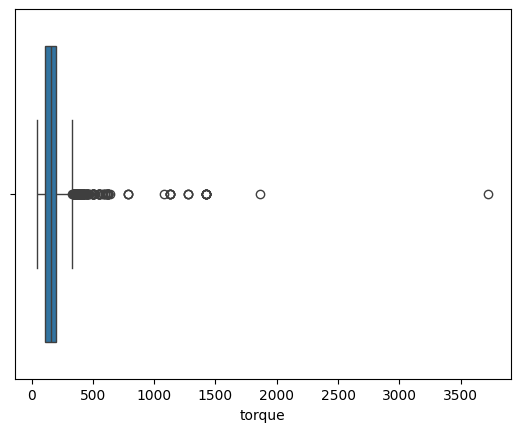

In [97]:
sns.boxplot(x=X_train['torque'])

In [98]:
# добавим филтры по значениям с диаграмм. Фильтр применяем только для трейна
X_train['price'] = y_train


X_train = X_train[X_train['year'] > 1995]
X_train = X_train[(X_train['max_power'] > 25) & (X_train['max_power'] < 300)]
X_train = X_train[X_train['km_driven'] < 0.5 * 1e6]
X_train = X_train[X_train['torque'] < 800]

y_train = X_train['price']
X_train = X_train.drop('price', axis=1)

Модель

In [99]:
pipeElastic = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ('ridge', Ridge(random_state=kRandomState))
])

param_grid = {
    'ridge__alpha': np.logspace(-2, 3, 2),
}

grid = GridSearchCV(pipeElastic, param_grid, cv=kfold_shuffled, scoring='r2')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'ridge__alpha': np.float64(0.01)}
0.8111520567964556


In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

model = Ridge(alpha=21.544346900318846)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'R2 train: {r2_score(y_train, y_train_pred)}')
print(f'MSE train: {MSE(y_train, y_train_pred)}')
print(f'RMSE train: {RMSE(y_train, y_train_pred)}')
print(f'R2 test: {r2_score(y_test, y_test_pred)}')
print(f'MSE test: {MSE(y_test, y_test_pred)}')
print(f'RMSE test: {RMSE(y_test, y_test_pred)}')

R2 train: 0.9078740326536763
MSE train: 25076900385.27919
RMSE train: 158356.8766592698
R2 test: 0.9352162567166284
MSE test: 35114106520.5398
RMSE test: 187387.58368830045


Получилось поднять r2 с 0.59 до 0.93. Если бы я сразу знал что и как надо делать, то можно было бы достичь лучшего результата..

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [101]:
def business_metrics(y_true, y_pred):
    # your code here
    return (abs(y_pred / y_true * 100 - 100) <= 10).sum() / len(y_pred)

business_metrics(y_test, y_test_pred)

np.float64(0.369215291750503)

Получается в ~37 процентах случаем модель прогнозирует цену в с точность 10% от реальной цены. Этот показатель лучше максимизировать. Теперь посмотрим на показатели других моделей

In [102]:
print("linear regression:", business_metrics(y_test_LinearRegression, y_test_pred_LinearRegression))
print("lasso:", business_metrics(y_test_Lasso, y_test_pred_Lasso))
print("elastic:", business_metrics(y_test_ElasticNet, y_test_pred_ElasticNet))

linear regression: 0.209
lasso: 0.213
elastic: 0.217


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Если представить, что прогноз делается для компании по продаже автомобилей, то продать машину по заниженной цене хуже, чем по завышенной. Поэтому посчитаем долю прогнозов, где была занижена цена.

In [103]:
def your_business_metrics(y_true, y_pred):
  return (y_pred - y_true < 0).sum() / len(y_pred)

your_business_metrics(y_test, y_test_pred)

np.float64(0.48490945674044267)

~48% случаев модель занижает прогноз. В условии поставленной задачи это плохой показатель и в данном случае в модель стоит добавить искуссветнное завышение прогноза. Другими словами эту метрику лучше минимизировать. Лучше выставить машину по более дорогой цене чем продать в убыток. Теперь посмотрим на другие обученные модели.

In [104]:
print("linear regression:", your_business_metrics(y_test_LinearRegression, y_test_pred_LinearRegression))
print("lasso:", your_business_metrics(y_test_Lasso, y_test_pred_Lasso))
print("elastic:", your_business_metrics(y_test_ElasticNet, y_test_pred_ElasticNet))

linear regression: 0.467
lasso: 0.469
elastic: 0.468


## Выгрузим Pickle-file с параметрами скалера и модели

In [105]:
import pickle

to_export = {
    'scaler': scaler,
    'model': model,
    'known_brands': export_brands,
    'known_models': export_models,
}

with open('to_export.pkl', 'wb') as f:
    pickle.dump(to_export, f)

Выделение функций для предобраотки данных

In [106]:
def converter_mileage(x, fuel):
  if pd.isna(x):
    return x

  val, units = x.split()
  if units == 'kmpl':
    return float(val)
  elif units == 'km/kg':
    if fuel == 'LPG':
      return float(val) * (1/520)
    elif fuel == 'CNG':
      return float(val) * (1/190)
    return float('nan')

def parse(s, col=0):
  if pd.isna(s):
    return s
  s = s.lower()
  words = []
  w = ""
  g = 'd'
  for i in s:
    if i in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-', '.', '~']:
      if g != 'd' and w != "":
          words.append(w)
          w =""
      g = 'd'
      w += i
    elif i.isalpha():
      if g != 'a' and w != "":
          words.append(w)
          w = ""
      g = 'a'
      w += i
    elif i in [' ', '@']:
      if w != "":
        words.append(w)
      w = ""
    elif i == ',':
      pass
    else:
      if w != "":
        words.append(w)
      w = ""
  if w != "":
      words.append(w)
  if 'at' in words:
    words.remove('at')

  torque = float(words[0])
  if 'kgm' in words:
    torque *= 9.80665
  rpm = float('nan')
  if any(c.isdigit() for c in words[1]):
    rpm = words[1]
  elif len(words) >= 3 and any(c.isdigit() for c in words[2]):
    rpm = words[2]
  else:
    return [torque, rpm][col]
  if '+/-' in s:
    w = ""
    for i in range(s.find('+/-'), len(s)):
      if s[i].isdigit():
        w += s[i]
    rpm = float(rpm)
    rpm = rpm + float(w)
  elif '-' in rpm:
    rpm = max(float(rpm.split('-')[0]), float(rpm.split('-')[1]))
  elif '~' in rpm:
    rpm = max(float(rpm.split('~')[0]), float(rpm.split('~')[1]))
  else:
    rpm = float(rpm)
  return [torque, rpm][col]

def GenFeatures(df):
  df['year2'] = df['year']**2
  df['engine2'] = df['engine']**2
  df['torque_log'] = np.log(df['torque'])

  df['age'] = 2025 - df['year']
  df['age2'] = df['age']**2

  df['power_per_volue'] = df['max_power'] / df['engine']
  df['torque_per_volue'] = df['torque'] / df['engine']
  df['torque+power'] = df['torque'] * df['max_power']

def AddNewFeatures(df):
  # этим нужно было заниматься раньше. Сейчас данные находятся в не очень удачном формате
  df['good_choice'] = ((df['seller_type_Individual'] == 1) & (df['owner_Fourth & Above Owner'] == 0)
      & (df['owner_Test Drive Car'] == 0) & (df['owner_Third Owner'] == 0))

def prepare(df, brands, models):
  df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
  df['max_power'] = df['max_power'].str.split().str[0]
  df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
  df['mileage'] = df.apply(lambda row: converter_mileage(row['mileage'], row['fuel']), axis=1)
  df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
  df['max_torque_rpm'] = df['torque'].apply(lambda x: parse(x, 1))
  df['torque'] = df['torque'].apply(lambda x: parse(x, 0))

  df['mileage'] = df['mileage'].fillna(df['mileage'].median())
  df['engine'] = df['engine'].fillna(df['engine'].median())
  df['max_power'] = df['max_power'].fillna(df['max_power'].median())
  df['torque'] = df['torque'].fillna(df['torque'].median())
  df['seats'] = df['seats'].fillna(df['seats'].median())
  df['max_torque_rpm'] = df['max_torque_rpm'].fillna(df['max_torque_rpm'].median())

  df['seats'] = df['seats'].astype(int)
  df['engine'] = df['engine'].astype(int)

  df = df.drop(columns=['mileage', 'max_torque_rpm', 'selling_price'], axis=1)

  df['model'] = df['name'].str.split().str[1]
  df['brand'] = df['name'].str.split().str[0]
  df = df.drop('name', axis=1)
  df = df[df['brand'].isin(brands) & df['model'].isin(models)]
  df = df.reset_index(drop=True)

  enc = OneHotEncoder(drop='first', sparse_output=False)
  columns = ['model', 'brand', 'owner', 'transmission', 'seller_type', 'fuel', 'seats']
  coded = enc.fit_transform(df[columns])
  df = pd.concat([df.drop(columns=columns, axis=1), pd.DataFrame(coded, columns=enc.get_feature_names_out(columns))], axis=1)

  GenFeatures(df)
  AddNewFeatures(df)

  df = df[df['year'] > 1995]
  df = df[(df['max_power'] > 25) & (df['max_power'] < 300)]
  df = df[df['km_driven'] < 0.5 * 1e6]
  df = df[df['torque'] < 800]





# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
